In [1]:
import os

In [2]:
os.chdir("D:\IRDM")

### Evaluation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

#### XGBoost

In [11]:
df_solution = pd.read_csv('solution.csv')
df_xgb = pd.read_csv('xgboost.csv')
df_solution = pd.merge(df_solution, df_xgb, how='left', on='id')
df_solution = df_solution[df_solution['Usage'] =='Public']

mae_xg = mean_absolute_error(df_solution.iloc[:,1], df_solution.iloc[:,3])
rmse_xg = math.sqrt(mean_squared_error(df_solution.iloc[:,1], df_solution.iloc[:,3]))
rmse_xg, mae_xg

(0.4875963258115359, 0.38891974539329932)

#### Random Forest

In [12]:
df_solution = pd.read_csv('solution.csv')
df_rf = pd.read_csv('rand_forest.csv')
df_solution = pd.merge(df_solution, df_rf, how='left', on='id')
df_solution = df_solution[df_solution['Usage'] =='Public']

mae_rf = mean_absolute_error(df_solution.iloc[:,1], df_solution.iloc[:,3])
rmse_rf = math.sqrt(mean_squared_error(df_solution.iloc[:,1], df_solution.iloc[:,3]))
rmse_rf, mae_rf

(0.5014717794107864, 0.40119616727433688)

#### Gradient Boost

In [13]:
df_solution = pd.read_csv('solution.csv')
df_gb = pd.read_csv('grad_boost.csv')
df_solution = pd.merge(df_solution, df_gb, how='left', on='id')
df_solution = df_solution[df_solution['Usage'] =='Public']

mae_gb = mean_absolute_error(df_solution.iloc[:,1], df_solution.iloc[:,3])
rmse_gb = math.sqrt(mean_squared_error(df_solution.iloc[:,1], df_solution.iloc[:,3]))
rmse_gb, mae_gb

(0.4751135789135695, 0.38169172078990804)

#### KNN

In [14]:
df_solution = pd.read_csv('solution.csv')
df_knn = pd.read_csv('knn.csv')
df_solution = pd.merge(df_solution, df_knn, how='left', on='id')
df_solution = df_solution[df_solution['Usage'] =='Public']

mae_knn = mean_absolute_error(df_solution.iloc[:,1], df_solution.iloc[:,3])
rmse_knn = math.sqrt(mean_squared_error(df_solution.iloc[:,1], df_solution.iloc[:,3]))
rmse_knn, mae_knn

(0.5203234401851281, 0.41257513076557301)

#### SVM

In [15]:
df_solution = pd.read_csv('solution.csv')
df_svm = pd.read_csv('svm.csv')
df_solution = pd.merge(df_solution, df_svm, how='left', on='id')
df_solution = df_solution[df_solution['Usage'] =='Public']

mae_sv = mean_absolute_error(df_solution.iloc[:,1], df_solution.iloc[:,3])
rmse_sv = math.sqrt(mean_squared_error(df_solution.iloc[:,1], df_solution.iloc[:,3]))
rmse_sv, mae_sv

(0.4899446104634989, 0.38441067540480878)

### Outcome distribution

In [20]:
test_y_rf = df_rf.values[:,1]
test_y_knn = df_knn.values[:,1]
test_y_grad_boost = df_gb.values[:,1]
test_y_xgb = df_xgb.values[:,1]
test_y_svm = df_svm.values[:,1]

Populating the interactive namespace from numpy and matplotlib


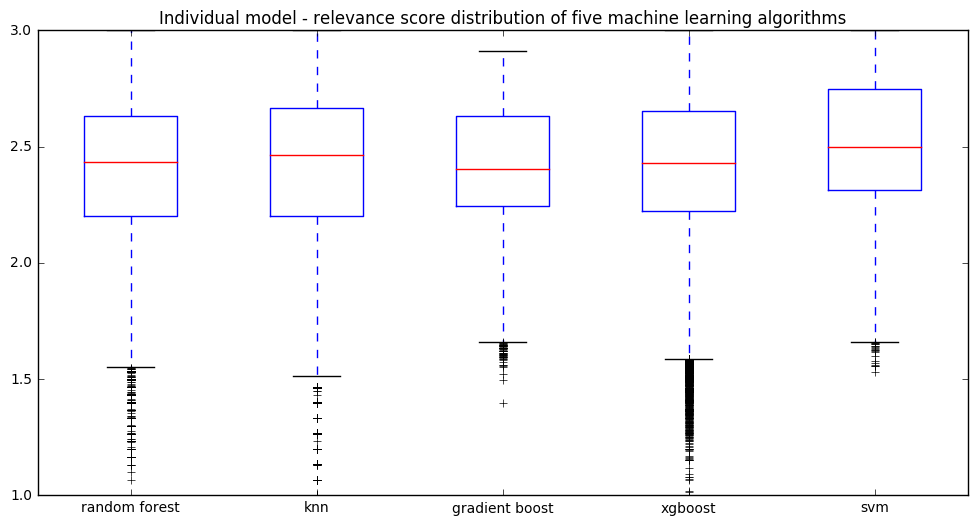

In [25]:
% pylab inline
rcParams['figure.figsize'] = (12.0, 6.0)
data=[test_y_rf,test_y_knn, test_y_grad_boost, test_y_xgb, test_y_svm]
plt.figure()
plt.boxplot(data)
plt.xticks([1,2,3,4,5],('random forest', 'knn', 'gradient boost', 'xgboost', 'svm'))
plt.title('Individual model - relevance score distribution of five machine learning algorithms')

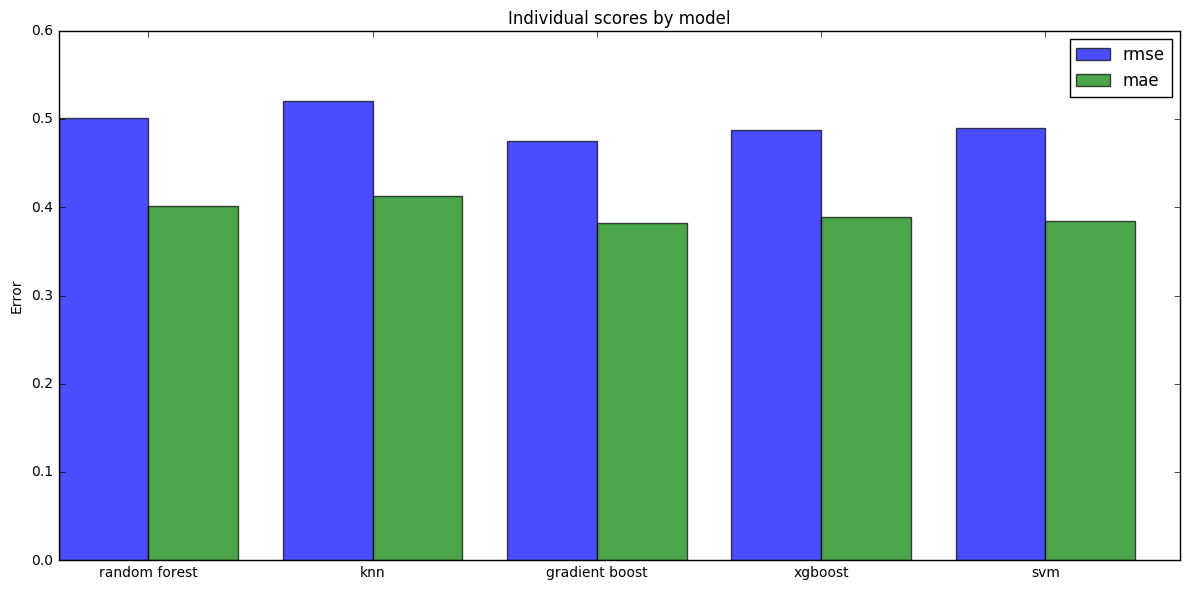

In [24]:
# data to plot
n_groups = 5
means_frank = (rmse_rf, rmse_knn, rmse_gb, rmse_xg, rmse_sv)
means_guido = (mae_rf, mae_knn, mae_gb, mae_xg, mae_sv)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.7
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='rmse')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='mae')
 
#plt.xlabel('Scores')
plt.ylabel('Error')
plt.title('Individual scores by model')
plt.xticks(index + bar_width, ('random forest', 'knn', 'gradient boost', 'xgboost', 'svm'))
plt.legend()
 
plt.tight_layout()
plt.show()
plt.show()